In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

100.0%
100.0%
100.0%
100.0%


In [2]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [3]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


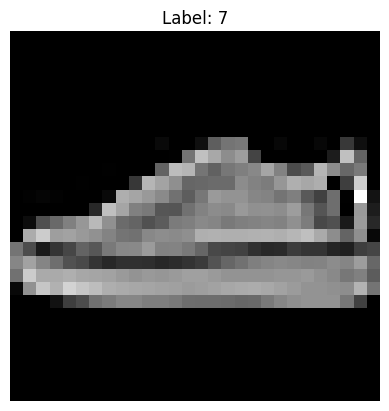

In [12]:
# Plot one

# torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch), size=(1,)).item()
image, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis(False);

In [13]:
# Baseline model
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)



In [16]:
torch.manual_seed(42)
class_names = train_data.classes

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [21]:
from timeit import default_timer as timer
def print_train_time(start:float, end: float, device:torch.device=None):
    total_time = end - start
    print(f"Train time on {device} is {total_time:.3f} seconds")
    return total_time

In [28]:
# !pip install tqdm
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time = timer()

n_epochs = 3

for epoch in tqdm(range(n_epochs)):
    print(f"Epoch {epoch}")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            print(f"Trained on {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader) # average loss per batch

    test_loss, test_acc = 0, 0

    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train loss: {train_loss:.3f}, Test loss: {test_loss:.3f}, Test_acc: {test_acc:.3f}\n")
end_time = timer()

total_train_time_model_0 = print_train_time(start_time, end_time, device='cpu')


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
Trained on 0 / 60000 samples.
Trained on 3200 / 60000 samples.
Trained on 6400 / 60000 samples.
Trained on 9600 / 60000 samples.
Trained on 12800 / 60000 samples.
Trained on 16000 / 60000 samples.
Trained on 19200 / 60000 samples.
Trained on 22400 / 60000 samples.
Trained on 25600 / 60000 samples.
Trained on 28800 / 60000 samples.
Trained on 32000 / 60000 samples.
Trained on 35200 / 60000 samples.
Trained on 38400 / 60000 samples.
Trained on 41600 / 60000 samples.
Trained on 44800 / 60000 samples.
Trained on 48000 / 60000 samples.
Trained on 51200 / 60000 samples.
Trained on 54400 / 60000 samples.
Trained on 57600 / 60000 samples.


 33%|███▎      | 1/3 [00:04<00:09,  4.65s/it]

Train loss: 0.431, Test loss: 0.459, Test_acc: 83.836

Epoch 1
Trained on 0 / 60000 samples.
Trained on 3200 / 60000 samples.
Trained on 6400 / 60000 samples.
Trained on 9600 / 60000 samples.
Trained on 12800 / 60000 samples.
Trained on 16000 / 60000 samples.
Trained on 19200 / 60000 samples.
Trained on 22400 / 60000 samples.
Trained on 25600 / 60000 samples.
Trained on 28800 / 60000 samples.
Trained on 32000 / 60000 samples.
Trained on 35200 / 60000 samples.
Trained on 38400 / 60000 samples.
Trained on 41600 / 60000 samples.
Trained on 44800 / 60000 samples.
Trained on 48000 / 60000 samples.
Trained on 51200 / 60000 samples.
Trained on 54400 / 60000 samples.
Trained on 57600 / 60000 samples.


 67%|██████▋   | 2/3 [00:09<00:04,  4.58s/it]

Train loss: 0.427, Test loss: 0.461, Test_acc: 84.075

Epoch 2
Trained on 0 / 60000 samples.
Trained on 3200 / 60000 samples.
Trained on 6400 / 60000 samples.
Trained on 9600 / 60000 samples.
Trained on 12800 / 60000 samples.
Trained on 16000 / 60000 samples.
Trained on 19200 / 60000 samples.
Trained on 22400 / 60000 samples.
Trained on 25600 / 60000 samples.
Trained on 28800 / 60000 samples.
Trained on 32000 / 60000 samples.
Trained on 35200 / 60000 samples.
Trained on 38400 / 60000 samples.
Trained on 41600 / 60000 samples.
Trained on 44800 / 60000 samples.
Trained on 48000 / 60000 samples.
Trained on 51200 / 60000 samples.
Trained on 54400 / 60000 samples.
Trained on 57600 / 60000 samples.


100%|██████████| 3/3 [00:13<00:00,  4.56s/it]

Train loss: 0.423, Test loss: 0.463, Test_acc: 83.966

Train time on cpu is 13.680 seconds
